Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.54      0.54      0.54        13
   virginica       0.54      0.54      0.54        13

    accuracy                           0.73        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.73      0.73      0.73        45

Confusion Matrix:
[[19  0  0]
 [ 0  7  6]
 [ 0  6  7]]


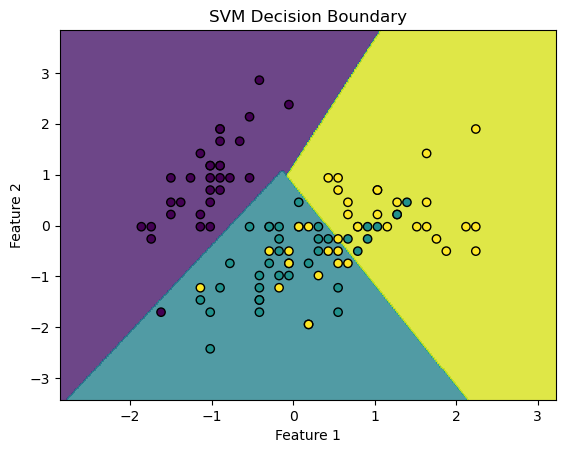

In [2]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 加载数据集（这里使用鸢尾花数据集）
iris = datasets.load_iris()
X = iris.data[:, :2]  # 只使用前两个特征以便于可视化
y = iris.target

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 特征标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 创建SVM分类器
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# 训练模型
svm_classifier.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = svm_classifier.predict(X_test)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 打印分类报告
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# 打印混淆矩阵
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 可视化决策边界
def plot_decision_boundary(X, y, model):
    h = .02  # 网格步长
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()

plot_decision_boundary(X_train, y_train, svm_classifier)

In [1]:
import numpy as np

class LinearSVM:
    def __init__(self, learning_rate=0.001, regularization_param=0.01, max_iter=1000):
        self.learning_rate = learning_rate  # 学习率
        self.regularization_param = regularization_param  # 正则化参数
        self.max_iter = max_iter  # 最大迭代次数

    def fit(self, X, y):
        # 初始化参数
        self.w = np.zeros(X.shape[1])
        self.b = 0

        m = X.shape[0]

        # 梯度下降法
        for i in range(self.max_iter):
            # 计算预测值
            margins = y * (np.dot(X, self.w) + self.b)

            # 计算梯度
            dw = np.zeros_like(self.w)
            db = 0

            for j in range(m):
                if margins[j] >= 1:
                    dw += self.regularization_param * self.w
                else:
                    dw += self.regularization_param * self.w - np.dot(X[j], y[j])
                    db += y[j]

            # 更新参数
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

    def predict(self, X):
        # 预测函数
        return np.sign(np.dot(X, self.w) + self.b)

    def decision_function(self, X):
        # 决策函数
        return np.dot(X, self.w) + self.b


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 加载数据集
iris = load_iris()
X = iris.data
y = iris.target

# 只选择前两类进行二分类
X = X[y != 2]
y = y[y != 2]
y = 2 * y - 1  # 转换为-1和+1

# 数据标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建SVM模型并训练
svm = LinearSVM(learning_rate=0.01, regularization_param=0.01, max_iter=1000)
svm.fit(X_train, y_train)

# 预测并评估
y_pred = svm.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Accuracy: 0.5666666666666667
